# Project Two
Jerome Fleischman, Daniel Portuondo, Isaac Attuah

Our goal for this project is to explore the formation of different decision trees from various subets within three domains from the UCI repository. This program will utilize the J48 Weka program
The domains that will be explored are:
* Congressional Voting
* Mushrooms
* Tic-Tac-Toe
* Dry Beans

### Import Libraries

In [1]:
# Install JVM
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

#Install Weka Wrapper
import sys
!{sys.executable} -m pip install python-weka-wrapper3

#Import Weka

import weka.core.jvm as jvm
import weka.core.converters as conv
from weka.classifiers import Evaluation, Classifier
from weka.core.classes import Random
from matplotlib import pyplot as plt

#Import Timer
import time

The system cannot find the path specified.
java version "11.0.2" 2019-01-15 LTS
Java(TM) SE Runtime Environment 18.9 (build 11.0.2+9-LTS)
Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.2+9-LTS, mixed mode)
'C:\Users\Isaac' is not recognized as an internal or external command,
operable program or batch file.


JVMNotFoundError: Can't find the Java Virtual Machine

## Congressional Voting

### Load Data

In [ ]:
# start jvm
jvm.start(packages=True)
data = conv.load_any_file(os.environ.get("JAVA_HOME")+os.sep+"house-votes-84.csv")
data.randomize(Random(1))
num_of_instances = data.num_instances
training_allocation = int(0.70 * num_of_instances)
training = data.subset(row_range='first-%s' %training_allocation)
testing = data.subset(row_range='%s-last' %training_allocation)
training.class_is_first() #class location
testing.class_is_first()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.7/dist-packages/javabridge/jars/rhino-1.7R4.jar', '/usr/local/lib/python3.7/dist-packages/javabridge/jars/runnablequeue.jar', '/usr/local/lib/python3.7/dist-packages/javabridge/jars/cpython.jar', '/usr/local/lib/python3.7/dist-packages/weka/lib/weka.jar', '/usr/local/lib/python3.7/dist-packages/weka/lib/python-weka-wrapper.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support enabled


## Configure Decision Tree Classifier

In [ ]:
# configure classifier
cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])
cls.build_classifier(training)
# cross-validate classifier

evl = Evaluation(testing)
#evl.crossvalidate_model(cls, testing, 10, Random(1))
#evl.evaluate_train_test_split(cls,testing,0.7)
evl.test_model(cls, testing)


# output statistics
print(evl.summary("=== J48 on Congressional Voting (stats) ===", False))
print(evl.matrix("=== J48 on Congressional Voting (confusion matrix) ==="))
#print(evl.percent_correct)
#print(evl.percent_incorrect)

=== J48 on Congressional Voting (stats) ===
Correctly Classified Instances         127               96.2121 %
Incorrectly Classified Instances         5                3.7879 %
Kappa statistic                          0.9214
Mean absolute error                      0.0661
Root mean squared error                  0.1777
Relative absolute error                 13.7463 %
Root relative squared error             36.2497 %
Total Number of Instances              132     

=== J48 on Congressional Voting (confusion matrix) ===
  a  b   <-- classified as
 51  2 |  a = republican
  3 76 |  b = democrat



## Configure Decision Tree Classifier on Subsets

In [ ]:
# generate subsets
num_of_instances = training.num_instances
num_of_subsets = 10
subset_accuracy_rates = []
subset_error_rates = []
induction_times = []
examples = []

for i in range(1,num_of_subsets + 1):
  subset_val = int((i/num_of_subsets) * num_of_instances)
  examples.append(subset_val)
  x = training.subset(row_range='first-%s'%subset_val)


  # configure classifier
  tic = time.perf_counter()
  cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])
  cls.build_classifier(x)
  # cross-validate classifier
  evl = Evaluation(testing)
  #evl.crossvalidate_model(cls, testing, 10, Random(1))
  #evl.evaluate_train_test_split(cls,testing,0.7)
  evl.test_model(cls, testing)
  tic = time.perf_counter() - tic

  # append subests and induction times
  subset_accuracy_rates.append(float(evl.percent_correct))
  subset_error_rates.append(float(evl.percent_incorrect))
  induction_times.append(tic)


print(subset_accuracy_rates)
print(subset_error_rates)
print(induction_times)
print(examples)

[96.21212121212122, 94.6969696969697, 95.45454545454545, 95.45454545454545, 96.21212121212122, 96.21212121212122, 96.21212121212122, 98.48484848484848, 96.96969696969697, 96.21212121212122]
[3.787878787878788, 5.303030303030303, 4.545454545454546, 4.545454545454546, 3.787878787878788, 3.787878787878788, 3.787878787878788, 1.5151515151515151, 3.0303030303030303, 3.787878787878788]
[0.0049935130000449135, 0.005156044000159454, 0.006105146000209061, 0.009621991000130947, 0.007616476000293915, 0.0110255419999703, 0.009152423000159615, 0.011286920999737049, 0.02372159099968485, 0.01282728300020608]
[30, 60, 91, 121, 152, 182, 212, 243, 273, 304]


## Plots

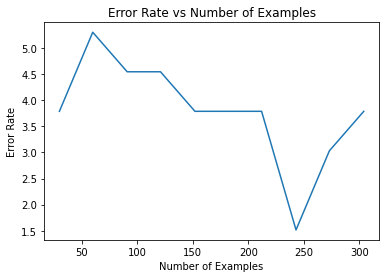

In [ ]:
plt.plot(examples , subset_error_rates)
plt.xlabel("Number of Examples")
plt.ylabel("Error Rate")
plt.title('Error Rate vs Number of Examples')
#plt.savefig('congress(errors).png')

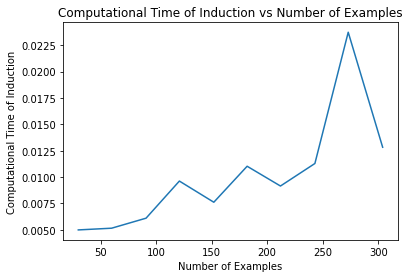

In [ ]:
plt.plot(examples , induction_times)
plt.xlabel("Number of Examples")
plt.ylabel("Computational Time of Induction")
plt.title('Computational Time of Induction vs Number of Examples')
#plt.savefig('congress(times).png')

## Mushrooms

### Load Data

In [ ]:
data = conv.load_any_file(os.environ.get("JAVA_HOME")+os.sep+"mushroom_data.csv")
data.randomize(Random(1))
num_of_instances = data.num_instances
training_allocation = int(0.70 * num_of_instances)
training = data.subset(row_range='first-%s' %training_allocation)
testing = data.subset(row_range='%s-last' %training_allocation)
training.class_is_first() #class location
testing.class_is_first()

### Configure Decision Tree Classifier

In [ ]:
# configure classifier
cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])
cls.build_classifier(training)
# cross-validate classifier

evl = Evaluation(testing)
#evl.crossvalidate_model(cls, testing, 10, Random(1))
#evl.evaluate_train_test_split(cls,testing,0.7)
evl.test_model(cls, testing)


# output statistics
print(evl.summary("=== J48 on Mushroom (stats) ===", False))
print(evl.matrix("=== J48 on Mushroom (confusion matrix) ==="))
#print(evl.percent_correct)
#print(evl.percent_incorrect)

=== J48 on Mushroom (stats) ===
Correctly Classified Instances        2526              100      %
Incorrectly Classified Instances         0                0      %
Kappa statistic                          1     
Mean absolute error                      0     
Root mean squared error                  0     
Relative absolute error                  0      %
Root relative squared error              0      %
Total Number of Instances             2526     

=== J48 on Mushroom (confusion matrix) ===
    a    b   <-- classified as
 1341    0 |    a = EDIBLE
    0 1185 |    b = POISONOUS



### Configure Decision Tree Classifier on Subsets

In [ ]:
# generate subsets
num_of_instances = training.num_instances
num_of_subsets = 10
subset_accuracy_rates = []
subset_error_rates = []
induction_times = []
examples = []

for i in range(1,num_of_subsets + 1):
  subset_val = int((i/num_of_subsets) * num_of_instances)
  examples.append(subset_val)
  x = training.subset(row_range='first-%s'%subset_val)


  # configure classifier
  tic = time.perf_counter()
  cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])
  cls.build_classifier(x)
  # cross-validate classifier
  evl = Evaluation(testing)
  #evl.crossvalidate_model(cls, testing, 10, Random(1))
  #evl.evaluate_train_test_split(cls,testing,0.7)
  evl.test_model(cls, testing)
  tic = time.perf_counter() - tic

  # append subests and induction times
  subset_accuracy_rates.append(float(evl.percent_correct))
  subset_error_rates.append(float(evl.percent_incorrect))
  induction_times.append(tic)


print(subset_accuracy_rates)
print(subset_error_rates)
print(induction_times)
print(examples)

[99.08946951702296, 99.08946951702296, 99.72288202692003, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[0.9105304829770388, 0.9105304829770388, 0.2771179730799683, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.013516118000097777, 0.015859909000027983, 0.018472510000265174, 0.020991314000184502, 0.03146434800009956, 0.033728323000104865, 0.027903680999770586, 0.021338513000046078, 0.03346844199995758, 0.02436811300003683]
[589, 1178, 1767, 2356, 2945, 3534, 4123, 4712, 5301, 5891]


### Plots

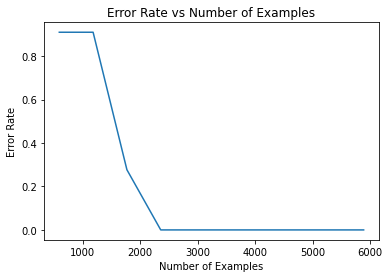

In [ ]:
plt.plot(examples , subset_error_rates)
plt.xlabel("Number of Examples")
plt.ylabel("Error Rate")
plt.title('Error Rate vs Number of Examples')
#plt.savefig('mushroom(errors).png')

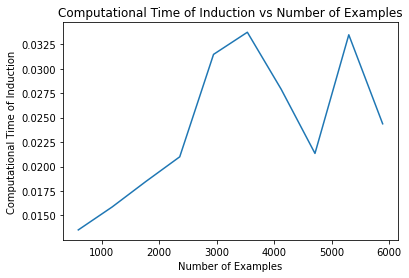

In [ ]:
plt.plot(examples , induction_times)
plt.xlabel("Number of Examples")
plt.ylabel("Computational Time of Induction")
plt.title('Computational Time of Induction vs Number of Examples')
plt.savefig('mushroom(times).png')

## Tic-Tac-Toe / Connect 4


## Load Data

In [ ]:
jvm.start(packages=True)
data = conv.load_any_file(os.environ.get("JAVA_HOME")+os.sep+"tic-tac-toe.csv")
data.randomize(Random(1))
num_of_instances = data.num_instances
training_allocation = int(0.70 * num_of_instances)
training = data.subset(row_range='first-%s' %training_allocation)
testing = data.subset(row_range='%s-last' %training_allocation)

training.class_is_last() #class location
testing.class_is_last() #class location

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


### Configure Decision Tree Classifier

In [ ]:
# configure classifier
cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])
cls.build_classifier(training)
# cross-validate classifier

evl = Evaluation(testing)
#evl.crossvalidate_model(cls, testing, 10, Random(1))
evl.evaluate_train_test_split(cls,testing,0.7)
evl.test_model(cls, testing)


# output statistics
print(evl.summary("=== J48 on Coupons (stats) ===", False))
print(evl.matrix("=== J48 on Coupons (confusion matrix) ==="))
#print(evl.percent_correct)
#print(evl.percent_incorrect)

=== J48 on Coupons (stats) ===
Correctly Classified Instances         318               55.2083 %
Incorrectly Classified Instances       258               44.7917 %
Kappa statistic                          0.1929
Mean absolute error                      0.4598
Root mean squared error                  0.6519
Relative absolute error                106.046  %
Root relative squared error            140.2276 %
Total Number of Instances              576     

=== J48 on Coupons (confusion matrix) ===
   a   b   <-- classified as
 169 225 |   a = positive
  33 149 |   b = negative



### Configure Decision Tree Classifier on Subsets

In [ ]:
# generate subsets
num_of_instances = training.num_instances
num_of_subsets = 10
subset_accuracy_rates = []
subset_error_rates = []
induction_times = []
examples = []

for i in range(1,num_of_subsets + 1):
  subset_val = int((i/num_of_subsets) * num_of_instances)
  examples.append(subset_val)
  x = training.subset(row_range='first-%s'%subset_val)


  # configure classifier
  tic = time.perf_counter()
  cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])
  cls.build_classifier(x)
  # cross-validate classifier
  evl = Evaluation(testing)
  #evl.crossvalidate_model(cls, testing, 10, Random(1))
  #evl.evaluate_train_test_split(cls,testing,0.7)
  evl.test_model(cls, testing)
  tic = time.perf_counter() - tic

  # append subests and induction times
  subset_accuracy_rates.append(float(evl.percent_correct))
  subset_error_rates.append(float(evl.percent_incorrect))
  induction_times.append(tic)


print(subset_accuracy_rates)
print(subset_error_rates)
print(induction_times)
print(examples)

[67.1280276816609, 73.35640138408304, 73.70242214532873, 73.01038062283737, 74.74048442906575, 74.0484429065744, 76.47058823529412, 82.69896193771626, 78.89273356401384, 78.89273356401384]
[32.8719723183391, 26.643598615916954, 26.29757785467128, 26.98961937716263, 25.259515570934255, 25.951557093425606, 23.529411764705884, 17.301038062283737, 21.10726643598616, 21.10726643598616]
[0.0040140920000339975, 0.004164826999840443, 0.004752968000047986, 0.005500222000137001, 0.0065852470002027985, 0.007202791000054276, 0.008123771000100533, 0.0108187360001466, 0.009537495999666135, 0.01018351899983827]
[67, 134, 201, 268, 335, 402, 468, 536, 603, 670]


### Plots

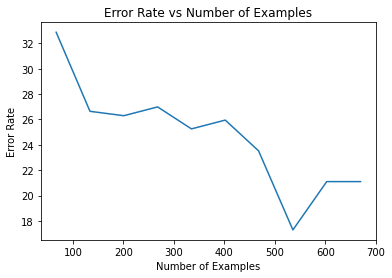

In [ ]:
plt.plot(examples , subset_error_rates)
plt.xlabel("Number of Examples")
plt.ylabel("Error Rate")
plt.title('Error Rate vs Number of Examples')
#plt.savefig('tic-tac-toe(errors).png')

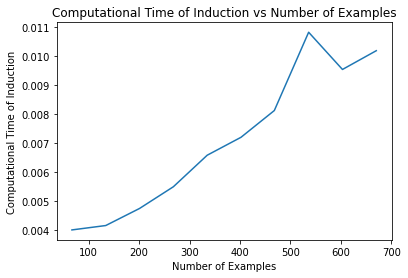

In [ ]:
plt.plot(examples , induction_times)
plt.xlabel("Number of Examples")
plt.ylabel("Computational Time of Induction")
plt.title('Computational Time of Induction vs Number of Examples')
#plt.savefig('tic-tac-toe(times).png')

## Dry Beans

### Load data

In [ ]:
data = conv.load_any_file(os.environ.get("JAVA_HOME")+os.sep+"Dry_Bean_Dataset.csv")
data.randomize(Random(1))
num_of_instances = data.num_instances
training_allocation = int(0.70 * num_of_instances)
training = data.subset(row_range='first-%s' %training_allocation)
testing = data.subset(row_range='%s-last' %training_allocation)
training.class_is_last() #class location
testing.class_is_last()

### Configure Decision Tree Classifier

In [ ]:
# configure classifier
cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])
cls.build_classifier(training)
# cross-validate classifier

evl = Evaluation(testing)
#evl.crossvalidate_model(cls, testing, 10, Random(1))
#evl.evaluate_train_test_split(cls,testing,0.7)
evl.test_model(cls, testing)


# output statistics
print(evl.summary("=== J48 on Dry Beans (stats) ===", False))
print(evl.matrix("=== J48 on Dry Beans (confusion matrix) ==="))
#print(evl.percent_correct)
#print(evl.percent_incorrect)

=== J48 on Dry Beans (stats) ===
Correctly Classified Instances        3703               90.6709 %
Incorrectly Classified Instances       381                9.3291 %
Kappa statistic                          0.8869
Mean absolute error                      0.0328
Root mean squared error                  0.1509
Relative absolute error                 13.914  %
Root relative squared error             43.9165 %
Total Number of Instances             4084     

=== J48 on Dry Beans (confusion matrix) ===
    a    b    c    d    e    f    g   <-- classified as
  564    4    0    0    0   18   17 |    a = SEKER
    4  349    0   35    3   12    0 |    b = BARBUNYA
    0    0  152    1    0    0    0 |    c = BOMBAY
    0   25    1  417    8    8    0 |    d = CALI
    0    3    0   15  552   22    8 |    e = HOROZ
   15    5    0    6    9  657   96 |    f = SIRA
   12    0    0    1    1   52 1012 |    g = DERMASON



### Configure Decision Tree Classifier on Subsets

In [ ]:
# generate subsets
num_of_instances = training.num_instances
num_of_subsets = 10
subset_accuracy_rates = []
subset_error_rates = []
induction_times = []
examples = []

for i in range(1,num_of_subsets + 1):
  subset_val = int((i/num_of_subsets) * num_of_instances)
  examples.append(subset_val)
  x = training.subset(row_range='first-%s'%subset_val)


  # configure classifier
  tic = time.perf_counter()
  cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])
  cls.build_classifier(x)
  # cross-validate classifier
  evl = Evaluation(testing)
  #evl.crossvalidate_model(cls, testing, 10, Random(1))
  #evl.evaluate_train_test_split(cls,testing,0.7)
  evl.test_model(cls, testing)
  tic = time.perf_counter() - tic

  # append subests and induction times
  subset_accuracy_rates.append(float(evl.percent_correct))
  subset_error_rates.append(float(evl.percent_incorrect))
  induction_times.append(tic)


print(subset_accuracy_rates)
print(subset_error_rates)
print(induction_times)
print(examples)

[88.24681684622918, 89.22624877571009, 88.29578844270323, 90.69539666993144, 89.93633692458374, 90.67091087169442, 90.03428011753184, 90.40156709108717, 90.05876591576886, 90.67091087169442]
[11.753183153770813, 10.773751224289912, 11.704211557296768, 9.304603330068561, 10.063663075416258, 9.329089128305583, 9.965719882468168, 9.59843290891283, 9.941234084231146, 9.329089128305583]
[0.04608573099994828, 0.08787306900012481, 0.13830576000009387, 0.14387412800033417, 0.19701056599978983, 0.2955348230002528, 0.23309868599972106, 0.2600788170002488, 0.31047736199980136, 0.3503056250001464]
[952, 1905, 2858, 3810, 4763, 5716, 6668, 7621, 8574, 9527]


### Plots

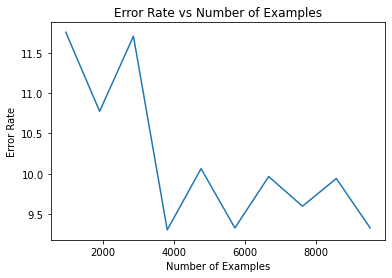

In [ ]:
plt.plot(examples , subset_error_rates)
plt.xlabel("Number of Examples")
plt.ylabel("Error Rate")
plt.title('Error Rate vs Number of Examples')
#plt.savefig('drybean(errors).png')

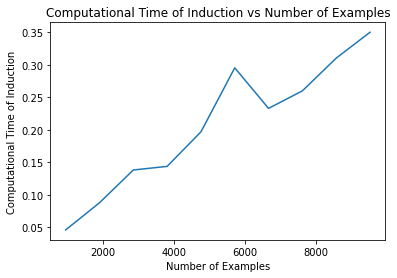

In [ ]:
plt.plot(examples , induction_times)
plt.xlabel("Number of Examples")
plt.ylabel("Computational Time of Induction")
plt.title('Computational Time of Induction vs Number of Examples')
#plt.savefig('drybean(times).png')

## Connect 4

### Load data

In [ ]:
data = conv.load_any_file(os.environ.get("JAVA_HOME")+os.sep+"connect-4.csv")
data.randomize(Random(1))
num_of_instances = data.num_instances
training_allocation = int(0.70 * num_of_instances)
training = data.subset(row_range='first-%s' %training_allocation)
testing = data.subset(row_range='%s-last' %training_allocation)
training.class_is_last() #class location
testing.class_is_last()

### Configure Decision Tree Classifier

In [ ]:
# configure classifier
cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])
cls.build_classifier(training)
# cross-validate classifier

evl = Evaluation(testing)
#evl.crossvalidate_model(cls, testing, 10, Random(1))
#evl.evaluate_train_test_split(cls,testing,0.7)
evl.test_model(cls, testing)


# output statistics
print(evl.summary("=== J48 on Connect 4 (stats) ===", False))
print(evl.matrix("=== J48 on Connect 4 (confusion matrix) ==="))
#print(evl.percent_correct)
#print(evl.percent_incorrect)

=== J48 on Connect 4 (stats) ===
Correctly Classified Instances       16366               80.744  %
Incorrectly Classified Instances      3903               19.256  %
Kappa statistic                          0.5926
Mean absolute error                      0.1662
Root mean squared error                  0.3235
Relative absolute error                 49.9857 %
Root relative squared error             79.334  %
Total Number of Instances            20269     

=== J48 on Connect 4 (confusion matrix) ===
     a     b     c   <-- classified as
 12263   343   685 |     a = win
   928   498   500 |     b = draw
  1118   329  3605 |     c = loss



### Configure Decision Tree Classifier on Subsets

In [36]:
# generate subsets
num_of_instances = training.num_instances
num_of_subsets = 10
subset_accuracy_rates = []
subset_error_rates = []
induction_times = []
examples = []

for i in range(1,num_of_subsets + 1):
  subset_val = int((i/num_of_subsets) * num_of_instances)
  examples.append(subset_val)
  x = training.subset(row_range='first-%s'%subset_val)


  # configure classifier
  tic = time.perf_counter()
  cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])
  cls.build_classifier(x)
  # cross-validate classifier
  evl = Evaluation(testing)
  #evl.crossvalidate_model(cls, testing, 10, Random(1))
  #evl.evaluate_train_test_split(cls,testing,0.7)
  evl.test_model(cls, testing)
  tic = time.perf_counter() - tic

  # append subests and induction times
  subset_accuracy_rates.append(float(evl.percent_correct))
  subset_error_rates.append(float(evl.percent_incorrect))
  induction_times.append(tic)


print(subset_accuracy_rates)
print(subset_error_rates)
print(induction_times)
print(examples)

[72.58374858157778, 75.61793872416004, 75.98302826977157, 77.75913957274656, 78.21303468350683, 78.77053628694065, 78.52385416152745, 79.24909961024224, 79.98914598648182, 80.7439932902462]
[27.41625141842222, 24.382061275839952, 24.016971730228427, 22.24086042725344, 21.786965316493166, 21.229463713059353, 21.476145838472544, 20.750900389757756, 20.01085401351818, 19.256006709753812]
[0.08218346299963741, 0.14914073399995686, 0.23707569700036402, 0.3135894120005105, 0.44755733300007705, 0.5443337850001626, 0.7100837079997291, 0.801254672000141, 0.9641427420001492, 1.061305844999879]
[4728, 9457, 14186, 18915, 23644, 28373, 33102, 37831, 42560, 47289]


### Plots

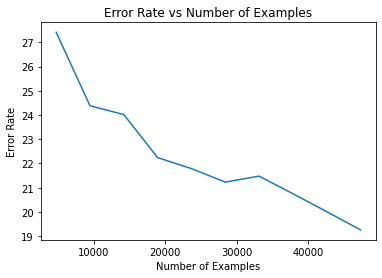

In [31]:
plt.plot(examples , subset_error_rates)
plt.xlabel("Number of Examples")
plt.ylabel("Error Rate")
plt.title('Error Rate vs Number of Examples')
plt.savefig('connect4(errors).png')

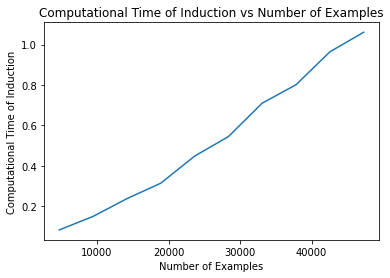

In [37]:
plt.plot(examples , induction_times)
plt.xlabel("Number of Examples")
plt.ylabel("Computational Time of Induction")
plt.title('Computational Time of Induction vs Number of Examples')
plt.savefig('connect4(times).png')

# End Session

In [ ]:
# stop jvm
# WARNING: JVM can only be run once. To re-run, click Runtime and Factory Reset Runtime
#jvm.stop()